In [2]:
#This notebook contains each of the Wichmann and Tsunami catalog
#observation distributions, their reference location and a brief 
#explanation of why we constructed them the way we did

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

WAVE HEIGHT OBSERVATIONS

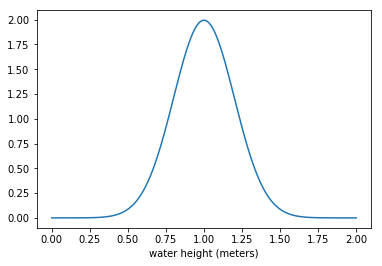

In [3]:
#Pulu Ai - Wichmann
#Pg 148 - "the flood wave reached only a few feet above the usual water level"
#North Shoreline coordinates - [-4.517863, 129.7745653]
mean = 1 #meter
variance = 0.2
Pulu_Ai_1 = stats.norm(mean,variance)
D_Pulu_Ai_1 = np.linspace(0,2,1000)
plt.plot(D_Pulu_Ai_1, Pulu_Ai_1.pdf(D_Pulu_Ai_1))
plt.xlabel("water height (meters)")
plt.show()


Justification: I chose the mean as 1.8 meters since this was given in the observation. The presence of two fairly precise measurements lead me to think that this the historical record is fairly accurate, so I chose the variance to be very small, about a third of a foot.

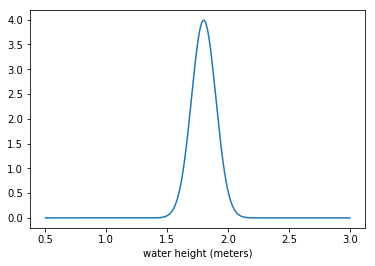

In [4]:
#Ambonia - Wichmann
#Pg 149 "the sea (the low water level climbed to 1.8m, a height that exceeded the 
#highest high water level by 20 cm"

#Port Shore coordinates: [-3.693521, 128.175538] 
#I JUST CHOSE THE PORT AS THE OBSERVATION LOCATION SINCE IT WAS THE LARGEST CITY, SO I ASSUME THE OLDEST
#WE'LL PROBABLY WANT TO DOUBLE CHECK THIS ONE.
mean = 1.8 #meters
variance = 0.1 
Amb_1 = stats.norm(mean,variance)
D_Amb_1 = np.linspace(0.5,3,1000)
plt.plot(D_Amb_1,Amb_1.pdf(D_Amb_1))
plt.xlabel("water height (meters)")
plt.show()

Justification: I chose the mean as 3m since this was the observation. I chose the variance to be 1m because I thought it was sufficiently large enough to reflect the absence of more information in the observation.

[]

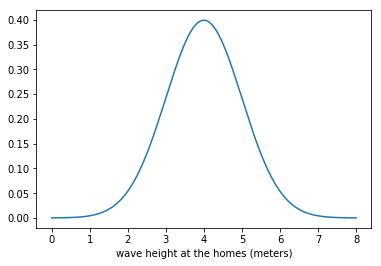

In [5]:
#Banda Neira - Tsunami Catalog
#Pg 242 - "The water rose to the roofs of the storehouses and homes"
#Fort Nassau side dock shore coordinates: [-4.529905, 129.897376]
mean = 4 #meters
variance = 1
Neira_1 = stats.norm(mean,variance)
D_Neira_1 = np.linspace(0,8,1000)
plt.plot(D_Neira_1, Neira_1.pdf(D_Neira_1))
plt.xlabel("wave height at the homes (meters)")
plt.plot()

Justification: traditional indonesian homes seemed to have very steep vaulted roofs their buildings, with stilts on the bottom, it seemed the height on most was well over 10 feet. I based this assumption off of pictures of lat 19th and early 20th century homes found at https://en.wikipedia.org/wiki/Architecture_of_Indonesia

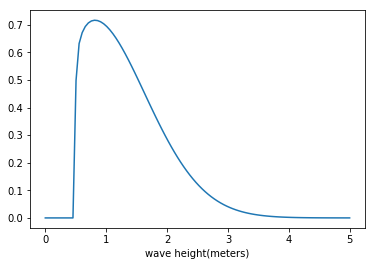

In [6]:
#Buru - Wichmann Catalog
#Pg 149 - "…Buru was reported merely the fact that an earthquake accompanied by a flood wave 
#had occurred, but without having caused damages."

#IM NOT SURE WHICH BURU THIS ONE IS TALKING ABOUT. GIVEN THE SIZE OF THE WAVE RELATIVE TO WHAT WAS OBSERVED IN AMBON
#I'M GUESSING THAT IT MEANS PULAU BURU. IN THAT CASE THE SOUTH SHORE COORDINATES ARE [-3.848928, 126.733678]
#THIS WAS THE TOWN WHERE THE AIRPORT AND DOCKS WERE.

k = 1.1        
Lower_L_Buru = 0         
Upper_L_Buru = 5      

## Don't edit code below this
domain = np.linspace(Lower_L_Buru,Upper_L_Buru,100)
plt.plot(domain, stats.chi(k).pdf(domain - .5))
plt.xlabel("wave height(meters)")
plt.show()


Justification:  this account does not give a wave height only that there was a wave. I ruled out all waves less than 0.5 meters because these would not have been not noticeable. To not have caused destruction, I think the wave would have been relatively small, so I made it skewed to the left to favor small waves. I thought the largest reasonable wave that could not have caused any damage would be around  2.5 meters. So I made a distribution that tapers quickly after this.


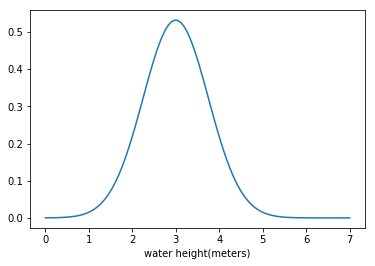

In [7]:
#Saparua - Wichmann Catalog
#Pg 149 - "a flood wave penetrated into the bay of Saparua four times 
#between 8:30 and 11 am and reached a height of 3m above the highest water level"

#I CHOSE BENTENG DURSTEDE'S SHORE, THE 17TH CENTURY DUTCH FORT, AS THE LOCATION FOR SAPARUA. 
#ITS COORDINATES ARE: [-3.576063, 128.658715]

mean = 3
var = .75

domain = np.linspace(0,7,100)
distrb = stats.norm(mean,var)
plt.plot(domain,distrb.pdf(domain))
plt.xlabel("water height(meters)")
plt.show()

Justification: I chose the mean as 3m since this was the observation. I chose the variance to be .75m because I thought it was sufficiently large to account for possible estimation error while excluding waves too small to be estimated as a 3m wave.




INUNDATION OBSERVATIONS

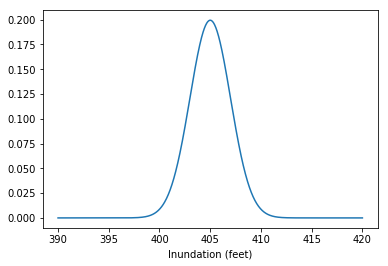

In [8]:
#Suparua - Wichmann
#Pg 149 - “in the environs of the localities Saparua and Tijau it 
#[the wave] thrust itself 405 feet inland”

#I CHOSE BENTENG DURSTEDE'S SHORE, THE 17TH CENTURY DUTCH FORT, AS THE LOCATION FOR SAPARUA. 
#ITS COORDINATES ARE: [-3.576063, 128.658715]

mean = 405
variance = 2 #feet squared
domain = np.linspace(390,420,1000)
distrb = stats.norm(mean,variance)

plt.plot(domain,distrb.pdf(domain))
plt.xlabel("Inundation (feet)")
plt.show()

Justification: Because of how specific the measurement in the record was I left the mean at 405 ft. For the same reason I made the variance very small to reflect the precision of the measurement.

THE FOLLOWING IS THE SAME OBSERVATION BUT DONE IN METERS FOR CONSISTENCY

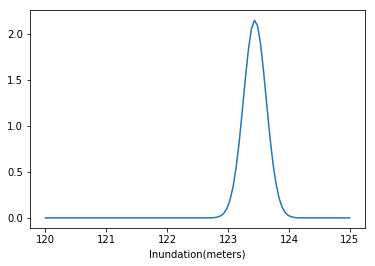

In [9]:
mean = 123.44
var = .185806 #meters squared
domain = np.linspace(120,125,100)
distrb = stats.norm(mean,var)

plt.plot(domain,distrb.pdf(domain))
plt.xlabel("Inundation(meters)")
plt.show()

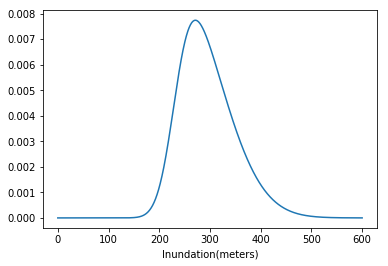

In [10]:
#Banda Neira - Wichmann
#Pg 148 - "Reached the base of the hill on which Fort
#Belgica is built on Banda Neira
#Fort Nassau side dock shore coordinates: [-4.529905, 129.897376]

mean = 231
var = 85
skew = 3
domain = np.linspace(0,600,1000)
distrib = stats.skewnorm.pdf(domain,skew,mean,var)
plt.plot(domain,distrib)
plt.xlabel("Inundation(meters)")
plt.show()


Justification: We generated data for this distribution using GIS. We chose an incline of X to be the base of the hill where Fort Belgica is situated. We then measured the distance from 20 random points on the beach to the edge of the hill and took the mean of those measurements as the mean of the distribution. However, the distances had a large variance with the closest distances being 50-100 meters and the farthest being over 400 meters. The majority of the town's shore is greater than 231 meters from shore, therefore we favored the greater distances with our skew and variance. It is also worth noting that based on a map from the 1820's, the majority of the town at the time of the event was also situated on the greater distance side of the fort. Lastly, while the fort closer to the shore, Fort Nassau, used to be called Fort Belgica, our map indicates that fort Belgica was moved to its current location before 1820 and before our event. 

INSERT DISTRIBUTION FOR LONTHOR - Pg 149 - Wichmann - "[THE WAVE REACHED] THE FOOT OF THE MOUNTAINS" HERE (Claire is working the elevation data for the western mountain.)

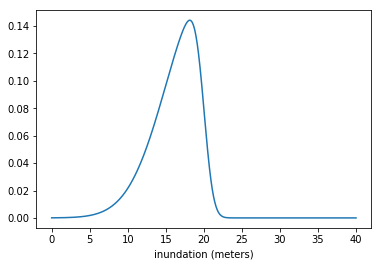

In [17]:
#---------------------------------------------------------------------------------------------------------
#NOTE: THIS DISTRIBUTION IS ONLY A PLACEHOLDER FOR LONTHOR. I SUSPECT THAT IT WILL BE A SKEWED DISTRIBUTION
#BUT THIS IS ONLY AN ARCHETYPE SO WHOEVER PUTS IN THE FINAL DISTRIBUTION CAN JUST ADJUST THE VALUES
#---------------------------------------------------------------------------------------------------------

#Lonthor - Wichmann
#Pg 149 - "[the wave reached] the foot of the mountains"

mean = 20
var = 5
skew = -5

domain = np.linspace(0,40,1000)
distrib = stats.skewnorm.pdf(domain,skew,mean,var)
plt.plot(domain,distrib)
plt.xlabel("inundation (meters)")
plt.show()

Justification: 



ARRIVAL TIME OBSERVATIONS
note: arrival times are in minutes after the earthquake that occured at 7:30 am

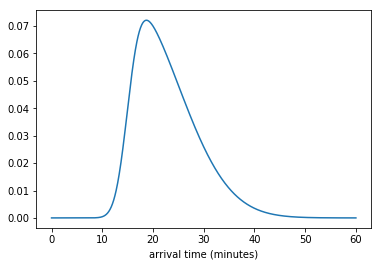

In [12]:
#Banda Neira - Wichmann
#Pg 144 - 145 - "Barely had the ground
#been calm for a quarter of an hour when the flood wave crashed in

#Fort Nassau side dock shore coordinates: [-4.529905, 129.897376]

mean = 15
var = 10
skew = 5

D_Neira_Time = np.linspace(0,60,1000)
Neira_Time = stats.skewnorm.pdf(D_Neira_Time, skew,mean,var)
plt.plot(D_Neira_Time, Neira_Time)
plt.xlabel("arrival time (minutes)")
plt.show()

Justification: We chose the mean to be 15 minutes to reflect the historical record. We chose a skewed distribution in order to favor arrival times that were later rather than earlier due to potential estimation error. Lastly, we chose a mild variance since it is unlikely that an arival time of greater than 30-40 minutes would be mistaken for a quarter of an hour after the event.

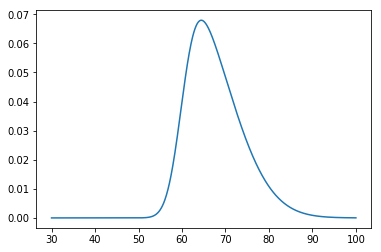

In [13]:
#Pulau Saparua - Wichmann
#the bay of saparua 4 times between 8:30-11Am" - From an earlier account
#I'm assuming the shaking happened at 7:30

#I CHOSE BENTENG DURSTEDE'S SHORE, THE 17TH CENTURY DUTCH FORT, AS THE LOCATION FOR SAPARUA. 
#ITS COORDINATES ARE: [-3.576063, 128.658715]

mean = 60
var = 10
skew = 3.5

D_Pulau_Sap_Time = np.linspace(30,100,1000)
Pulau_Sap_Time = stats.skewnorm.pdf(D_Pulau_Sap_Time,skew,mean,var)
plt.plot(D_Pulau_Sap_Time,Pulau_Sap_Time)
plt.show()

Justification: I favored later times again since we were given a broad window of 8:30 to 11 for the wave oscillations, however, I think we can assume the first wave arrived near 8:30. 

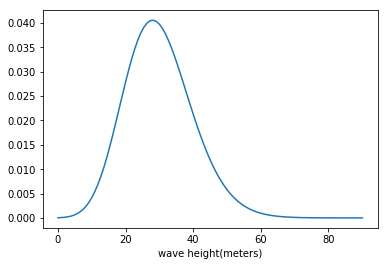

In [14]:
#---------------------------------------------------------------------
#THIS IS THE AMBONIA OBSERVATION THAT WE ARE OMITTING FROM THIS RUN.
#---------------------------------------------------------------------
#Pulau Ambon (Ambonia) - Whichmann
#Pg 149 - "The wave arrived shortly after...[the flooding and draining] repeated some
#20 times until 2 pm"

#North Shoreline coordinates - [-4.517863, 129.7745653]

k = 50        
Lower_L_Buru = 0         
Upper_L_Buru = 90      


domain = np.linspace(Lower_L_Buru,Upper_L_Buru,100)
plt.plot(domain, stats.chi2(k).pdf(domain + 20))
plt.xlabel("wave height(meters)")
plt.show()


Note: Ambon is only 10 miles from saparua, that means that the wave likely hit here only 10-20 minutes off from saparua. Perhaps we could adapt this distibution to be a higher variance than Saparua?